In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2015,2016,2017 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Simple Sounding

Use MetPy as straightforward as possible to make a Skew-T LogP plot.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

In [4]:
# Change default to be better for skew-T
plt.rcParams['figure.figsize'] = (9, 9)

In [5]:
# Upper air data can be obtained using the siphon package, but for this example we will use
# some of MetPy's sample data.

col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

df = pd.read_fwf(get_test_data('jan20_sounding.txt', as_file_obj=False),
                 skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)

# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'
                       ), how='all').reset_index(drop=True)

We will pull the data out of the example dataset into individual variables and
assign units.

In [6]:
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

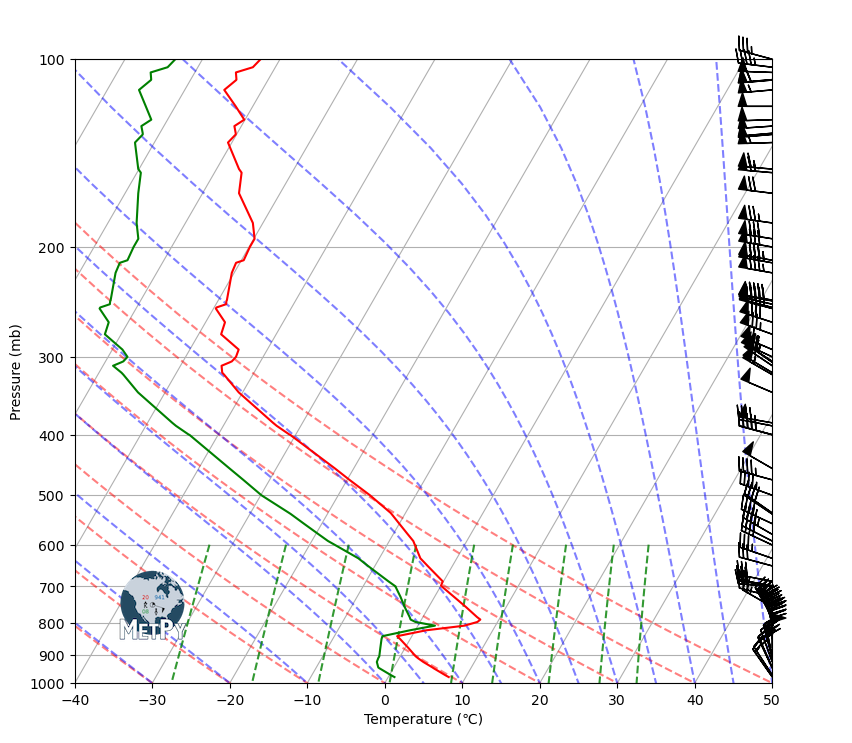

In [7]:
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Set some better labels than the default
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (mb)')

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 100)

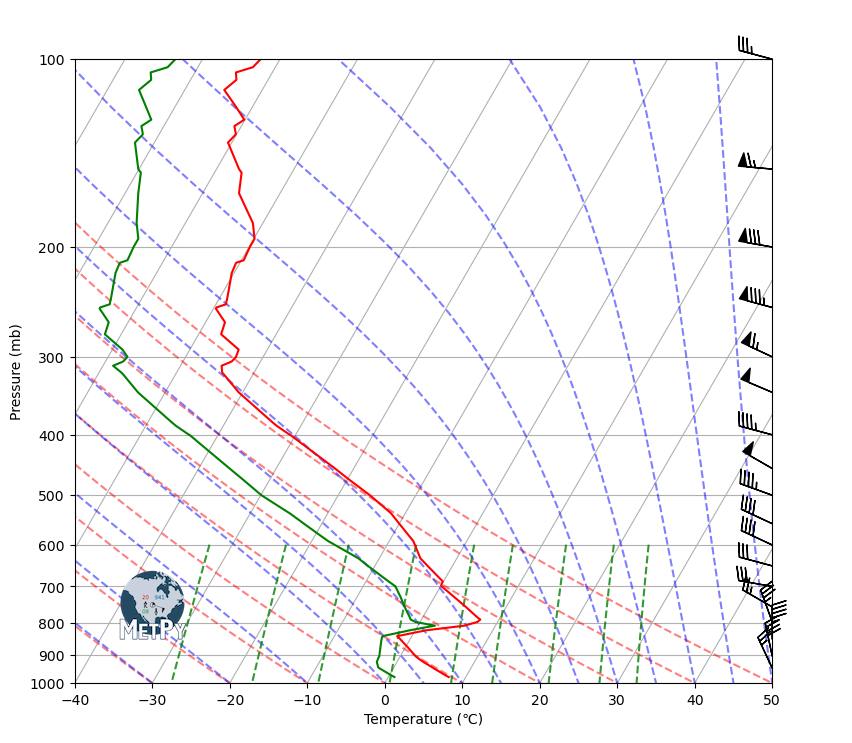

In [8]:
# Example of defining your own vertical barb spacing
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

# Set some better labels than the default
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (mb)')

# Set spacing interval--Every 50 mb from 1000 to 100 mb
my_interval = np.arange(100, 1000, 50) * units('mbar')

# Get indexes of values closest to defined interval
ix = mpcalc.resample_nn_1d(p, my_interval)

# Plot only values nearest to defined interval values
skew.plot_barbs(p[ix], u[ix], v[ix])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 100)

# Show the plot
plt.show()